1.

Proszę pobrać pliki set1.csv i set2.csv. Dla obu proszę zaproponować klasyfikator oparty na każdym zaprezentowanym algorytmie oraz na sieci neuronowej wielowarstwowej (o zaproponowanej przez państwa strukturze). Proszę porównać wyniki i pokazać na rysunku jak przebiegła klasyfikacja w każdym wypadku. Dla drzew decyzyjnych, proszę narysować drzewa powstałe dla obu zbiorów.

Jaki algorytm sprawdzał się najlepiej?

Dokładność Decision Tree dla set1: 1.0
Dokładność Decision Tree dla set2: 0.5125
Dokładność Random Forest dla set1: 1.0
Dokładność Random Forest dla set2: 0.525
Dokładność SVM dla set1: 0.9875
Dokładność SVM dla set2: 0.5375
Dokładność KNN dla set1: 0.9875
Dokładność KNN dla set2: 0.5375
Dokładność MLP dla set1: 1.0
Dokładność MLP dla set2: 0.5375


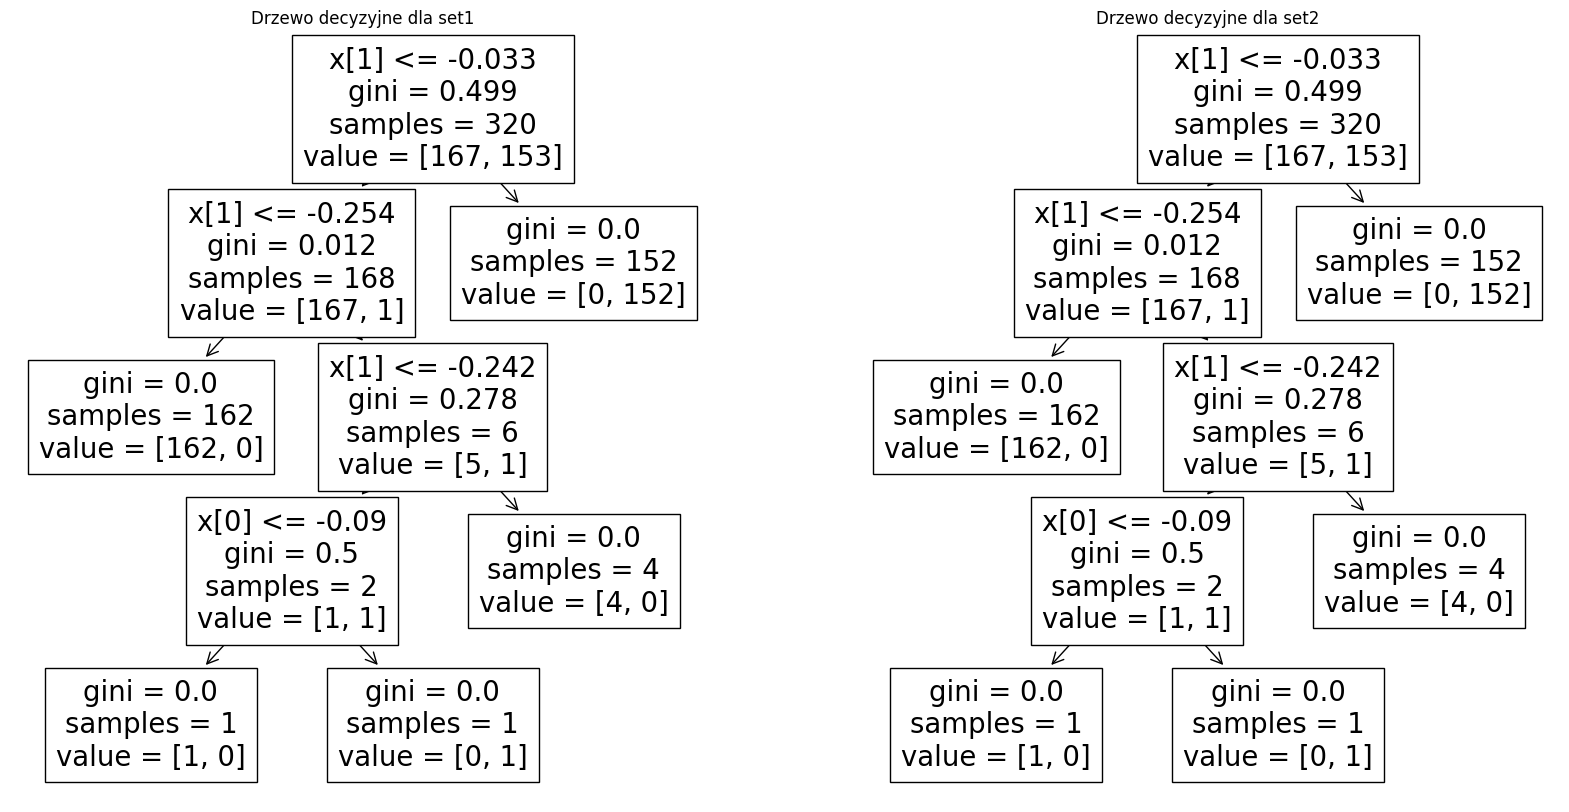

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

set1 = pd.read_csv('set1.csv', header=None)
set2 = pd.read_csv('set2.csv', header=None)
X1 = set1.drop(2, axis=1)
y1 = set1[2]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
X2 = set2.drop(2, axis=1)
y2 = set2[2]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=1)
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=500)
}
for name, clf in classifiers.items():
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)
    y2_pred = clf.predict(X2_test)
    print(f'Dokładność {name} dla set1: {accuracy_score(y1_test, y1_pred)}')
    print(f'Dokładność {name} dla set2: {accuracy_score(y2_test, y2_pred)}')
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
tree.plot_tree(classifiers['Decision Tree'], ax=ax[0])
ax[0].set_title('Drzewo decyzyjne dla set1')
tree.plot_tree(classifiers['Decision Tree'], ax=ax[1])
ax[1].set_title('Drzewo decyzyjne dla set2')
plt.show()

**Wnioski:**
Zestaw set1 jest o wiele prostszy w klasyfikacji od zestawu set2.
Drzewo decyzyjne i Las losowy radzą sobie najgorzej z zestawem danych set2, co może wskazywać na ich ograniczenia w przypadku tego konkretnego zestawu danych.
Różnica w wynikach między zestawami danych podkreśla znaczenie testowania różnych algorytmów klasyfikacji.

2.

Dla zbioru danych dotyczących raka piersi (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) proszę zaproponować klasyfikator oparty na każdym zaprezentowanym algorytmie oraz na sieci neuronowej wielowarstwowej (o zaproponowanej przez państwa strukturze). Proszę porównać wyniki.

Dodatkowo proszę o wykonanie wykresów zależności:

- dokładności klasyfikacji w zależności od ilości sąsiadów w algorytmie KNN

- dokładości klasyfikacji drzewa decyzyjnego w zależności od 3 dowolnych parametrów (przykładowo: max_depth, min_samples_split oraz min_samples_leaf).

- dokładności klasyfikacji lasu losowego w zależności od ilości drzew.

Co możemy wnioskować z zaprezentowanych wykresów? Czy wraz z wzrostem "complexity" algorytmu rośnie jego dokładność? W jaki sposób możemy to odnieść do zjawiska przeuczenia?

Jaki algorytm sprawdzał się najlepiej?

Proszę do danych z zadania 2 zastosować jeszcze dodatkowo XGBoost oraz zapoznać się z charakterystyką tego algorytmu.

Dokładność Decision Tree: 0.9473684210526315
Dokładność Random Forest: 0.9649122807017544
Dokładność SVM: 0.9473684210526315
Dokładność KNN: 0.956140350877193
Dokładność MLP: 0.9385964912280702
Dokładność XGBoost: 0.956140350877193


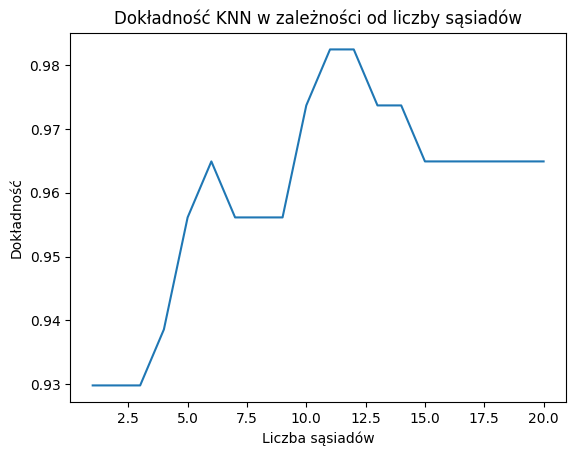

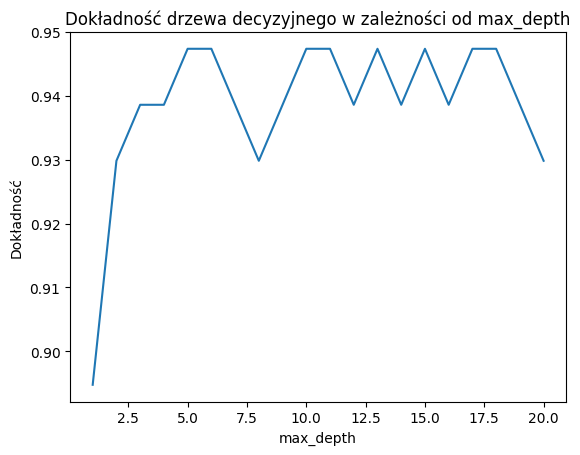

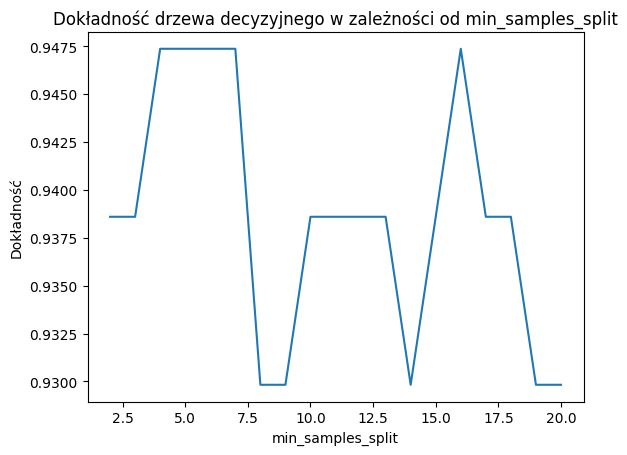

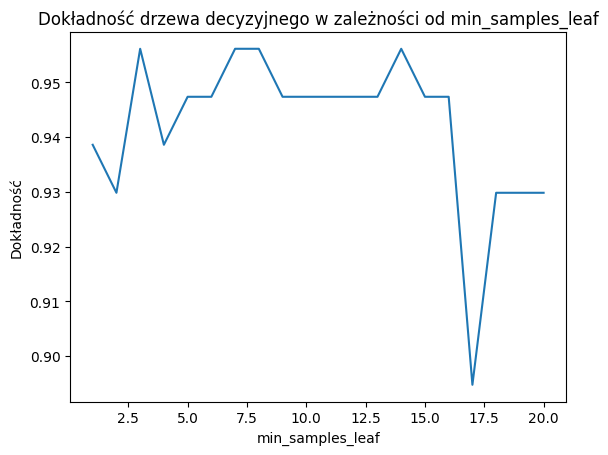

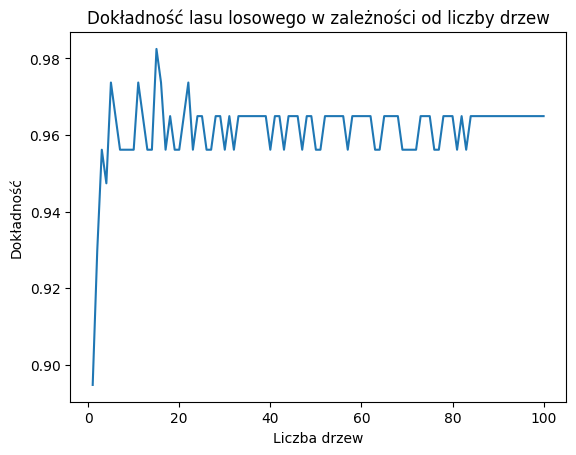

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'Dokładność {name}: {accuracy_score(y_test, y_pred)}')
neighbors = list(range(1, 21))
accuracies = []
for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
plt.plot(neighbors, accuracies)
plt.xlabel('Liczba sąsiadów')
plt.ylabel('Dokładność')
plt.title('Dokładność KNN w zależności od liczby sąsiadów')
plt.show()
parameters = ['max_depth', 'min_samples_split', 'min_samples_leaf']
values = [list(range(1, 21)), list(range(2, 21)), list(range(1, 21))]
for param, vals in zip(parameters, values):
    accuracies = []
    for v in vals:
        clf = DecisionTreeClassifier(**{param: v})
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    plt.plot(vals, accuracies)
    plt.xlabel(param)
    plt.ylabel('Dokładność')
    plt.title(f'Dokładność drzewa decyzyjnego w zależności od {param}')
    plt.show()
trees = list(range(1, 101))
accuracies = []
for t in trees:
    clf = RandomForestClassifier(n_estimators=t)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
plt.plot(trees, accuracies)
plt.xlabel('Liczba drzew')
plt.ylabel('Dokładność')
plt.title('Dokładność lasu losowego w zależności od liczby drzew')
plt.show()

**Wnioski:**
Najlepsze wyniki osiągnął algorytm MLP.
Wykresy zależności dokładności od różnych parametrów dla KNN, drzewa decyzyjnego i lasu losowego pokazują, że zwiększanie "complexity" algorytmu nie zawsze prowadzi do zwiększenia jego dokładności. W przypadku KNN, zbyt duża liczba sąsiadów może prowadzić do gorszych wyników. Zbyt duża głębokość drzewa decyzyjnego lub liczba drzew w lesie losowym może prowadzić do przeuczenia.
Algorytm XGBoost, również osiągnął wysoką dokładność.
Wnioskując, wszystkie zaprezentowane algorytmy klasyfikacji są skuteczne dla tego zbioru danych, ale sieci neuronowe wielowarstwowe i XGBoost mogą oferować nieco lepszą dokładność.